#General Information

Welcome to the final Assignment. We will be applying the concepts we have learned over this week to solve this week's assignments. So, Let's get started! Goodluck!

Please fill out your name and email in the below cell



In [ ]:
#NAME : BENJAMIN DEBBARMA
#EMAIL : debbarmabenjamin69@gmail.com

#Assignment 7 (50 Marks)

Hello folks!
We congratulate you for reaching the final assignments. We wish you luck for the same. In this notebook you're supposed to predict the asteroid size using various algorithms and find out the R2 Score. Fine tune the model to get best possible R2 Score.

Get the Aestroid Dataset using the following link

https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv 

# Question No:1 (5 Marks)

A. Give Little Overview about Overfitting, Underfitting, Data Augumentation, Data Simplification and Regularization.

1. Impact of Overfitting (1 Marks)

2. Impact of Underfitting (1 Marks)

3. Significance of Data Augmentation (1 Marks)

4. Significance of Data Simplification (1 Marks)

5. Importance of Regularization (1 Marks)

**1)Impact of Overfitting:-** Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.



**2)Impact of Underfitting:-**Underfitting is a scenario where a data model is unable to capture the relationship between the input and output variables accurately, generating a high error rate on both the training set and unseen data. When a model is underfitted, it cannot establish the dominant trend within the data, resulting in training errors and poor performance of the model. If a model cannot generalize well to new data, then it cannot be leveraged for classification or prediction tasks.

**3)Significance of Data Augmentation**:- Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data.Most companies don’t have enough data to train their ML models. This is where data augmentation comes in: even if you’re starting with very little, you can end up with massive amounts of data to generate insights, predictions, and recommendations that were previously unavailable due to a lack of relevant information.

**4)Significance of Data Simplification**:- Data simplification is the most effective way to transmit the message necessary for making a decision, as everything is transparent and recognizable at a glance. Unifying the data and condensing the information in one place is much easier to recognize and compare a large quantity of data at once. This can help companies identify trends, analyze their performance, and make more precise forecasts.

**5)Importance of Regularization**:- Regularization is a technique to prevent the model from overfitting by adding extra information to it. Sometimes the machine learning model performs well with the training data but does not perform well with the test data. It means the model is not able to predict the output when deals with unseen data by introducing noise in the output, and hence the model is called overfitted. This problem can be deal with the help of a regularization technique. This technique can be used in such a way that it will allow to maintain all variables or features in the model by reducing the magnitude of the variables. Hence, it maintains accuracy as well as a generalization of the model.

In [ ]:
#Your Answer
#THIS FUNCTION IS TO CHECK WHETHER GPU SUPPORT IS ENABLED OR NOT
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#Question No:2 (5 Marks)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A. Perfom EDA on the dataset and bring out reduced and more significant dataset for Modelling

Following are the questions you will need to answer:

1. Clean the dataset(Checking missing values and replacing)  (1 marks)

2. Use Seaborn Heat map and box plot for correlation and finalize features (2 marks)

3. Use Feature reduction techniques such as PCA (2 marks)




In [11]:
##Your Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
#import pickle
#from scipy import stats # For the normal and probility dist chart 
#from scipy.stats import norm
#sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

file = '/content/drive/MyDrive/Asteroid_Updated.csv'
df = pd.read_csv(file, sep=',',low_memory=False)

#df = pd.read_csv('/content/Asteroid_Updated.csv', low_memory=False)#, error_bad_lines=False)
df.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [12]:
df.shape

(839714, 31)

In [13]:
columns=['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'diameter', 'albedo', 'rot_per', 'moid','n', 'per', 'ma']
df = df[columns]
df = df.dropna(subset=["diameter", "rot_per"]) # Removing rows with null diameter
df = df[pd.to_numeric(df['diameter'], errors='coerce').notnull()] # Removing non numeric values
df = df.dropna()
df = df.astype(float)

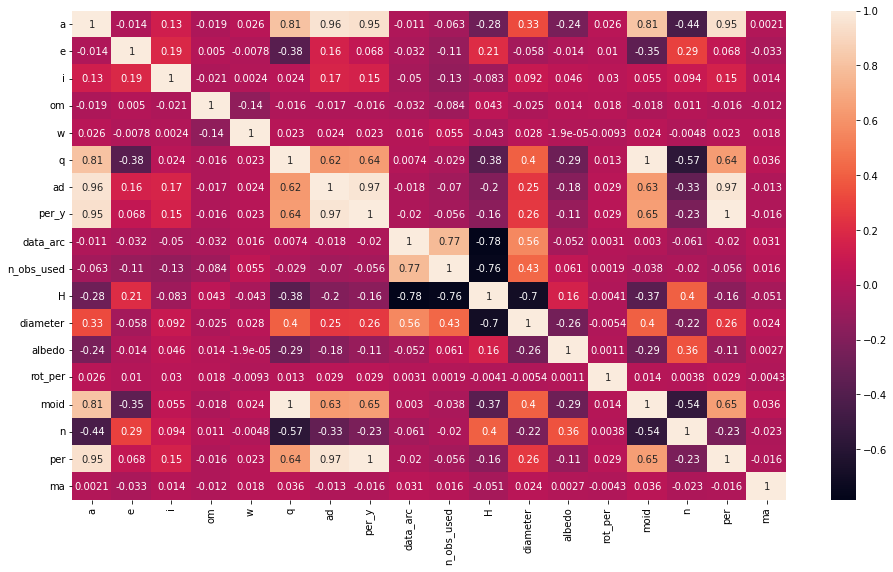

In [14]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corrmat, vmax=1, annot=True)

In [15]:
corrmat["diameter"].abs().sort_values(ascending=False).head(18)

diameter      1.000000
H             0.699885
data_arc      0.558719
n_obs_used    0.430728
moid          0.404641
q             0.401024
a             0.325324
albedo        0.258148
per_y         0.256075
per           0.256075
ad            0.250930
n             0.223180
i             0.092176
e             0.057735
w             0.028026
om            0.024613
ma            0.024209
rot_per       0.005362
Name: diameter, dtype: float64

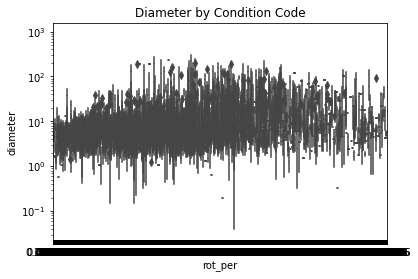

In [16]:
sns.boxplot(x='rot_per', y='diameter', data=df)
plt.title('Diameter by rot_per')
plt.yscale('log');

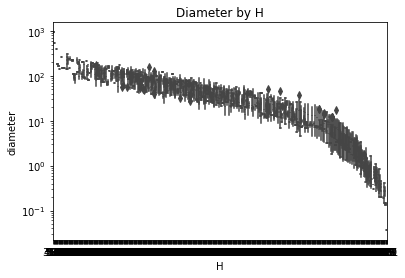

In [17]:
sns.boxplot(x='H', y='diameter', data=df)
plt.title('Diameter by H')
plt.yscale('log');

In [18]:
# After analysing HeatMap & boxplo,it can be said that 'H' has a strong collinearity with diameter
#& we can eliminate some columns which doesn't have much colinearity
#e,i,w,rot_per,ma,om
dropNumColumn = ['e','i','w','rot_per','ma','om']

df = df.drop(dropNumColumn, axis = 1)

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#df = df.round(decimals=5)
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data

array([[-1.09746319e-02,  2.38958930e-01, -1.23420274e-01, ...,
         2.62371706e-01, -2.20153219e-01, -3.23908242e-02],
       [-8.18312024e-03, -2.86809432e-01,  1.19677400e-01, ...,
        -1.90197865e-01, -2.24417913e-01, -3.12214510e-02],
       [-9.55594518e-02, -4.73113463e-01,  8.80660828e-02, ...,
        -4.38927117e-01, -8.46379904e-02, -6.74913263e-02],
       ...,
       [-1.63335609e+00, -2.14765919e+00, -1.19872932e+00, ...,
        -1.72323237e+00,  1.14175750e+01, -5.74872230e-01],
       [-1.57853404e-02, -1.80955769e+00,  8.02841225e-01, ...,
        -1.57838374e+00, -2.12773827e-01, -3.44044101e-02],
       [-3.00593133e-01, -1.55091589e+00,  3.05561211e-01, ...,
        -1.56104404e+00,  3.02939644e-01, -1.49845929e-01]])

In [20]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca.shape

(11153, 2)

In [21]:
pca.explained_variance_ratio_

array([0.47476951, 0.24300662])

In [22]:
scaled_data

array([[-1.09746319e-02,  2.38958930e-01, -1.23420274e-01, ...,
         2.62371706e-01, -2.20153219e-01, -3.23908242e-02],
       [-8.18312024e-03, -2.86809432e-01,  1.19677400e-01, ...,
        -1.90197865e-01, -2.24417913e-01, -3.12214510e-02],
       [-9.55594518e-02, -4.73113463e-01,  8.80660828e-02, ...,
        -4.38927117e-01, -8.46379904e-02, -6.74913263e-02],
       ...,
       [-1.63335609e+00, -2.14765919e+00, -1.19872932e+00, ...,
        -1.72323237e+00,  1.14175750e+01, -5.74872230e-01],
       [-1.57853404e-02, -1.80955769e+00,  8.02841225e-01, ...,
        -1.57838374e+00, -2.12773827e-01, -3.44044101e-02],
       [-3.00593133e-01, -1.55091589e+00,  3.05561211e-01, ...,
        -1.56104404e+00,  3.02939644e-01, -1.49845929e-01]])

In [23]:
x_pca

array([[  7.76493425, -13.28284037],
       [  5.27359469, -15.95549372],
       [  2.58680613, -11.01633313],
       ...,
       [ -6.4114787 ,   3.26592605],
       [ -1.64565684,   2.58541425],
       [ -1.94796971,   2.966043  ]])

# Question No:3 ( 25 Marks )

A.Data Modelling using various Machine Learning Algorithms (Use Linear, KNN , Support Vector Machining , Random Forest , Gradient Boost, XG Boost) on processed dataset and Obtain performance metric R2 score:

  1. Give little theoritical overview about Error Metrics and R2 metrics.(5 Marks) 

  2. Data Modelling using Linear Regression Algorithm (2 Marks)

  3. Data Modelling using KNN Algorithm (3 Marks)

  4. Data Modelling using Support Vector Machining Algorithm (3 Marks)

  5. Data Modelling using Random Forest Algorithm (2 Marks)

  6. Data Modelling using Gradient Boosting Algorithm (2 Marks)

  7. Data Modelling using XG Boost Algorithm (3 Marks)

  8. Justify the best Model using R2 score (5 Marks)

****Error Metrics:-**** An error metric is a way to quantify the performance of a model and provides a way for the forecaster to quantitatively compare the performance of different ML models. They give us a way to more objectively gauge how well the model executes its tasks accurately.There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model:
1)Mean Squared Error (MSE).
2)Root Mean Squared Error (RMSE).
3)Mean Absolute Error (MAE)

**R2 metrics:-** R-squared(R2) metrics is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [96]:
#CREATING A LIST TO STORE THE NAME OF THE MODEL & THEIR RESPECTIVE R2 SCORE
#SO THAT WE CAN PLOT A GRAPH BETWEEN THE MODEL & THEIR SCORE AT THE END
algorithms = []
scores = []

In [39]:
y = df['diameter']
x = df.drop(['diameter'],axis = 1)
SS_scaler = StandardScaler()
X_std = SS_scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
print('Shape of X and Y',x.shape,y.shape )
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('Y_train_shape',y_train.shape)
print('Y_test_shape',y_test.shape)


Shape of X and Y (11153, 11) (11153,)
X_train_shape (8922, 2)
X_test_shape (2231, 2)
Y_train_shape (8922,)
Y_test_shape (2231,)


In [97]:
##Your Code
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score        
from sklearn.linear_model import LinearRegression

##Applying Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

DiameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, DiameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,DiameterPrediction)
print("R2 Score : ",r2)

algorithms.append('LinearReg')
scores.append(r2)

root mean square error : 23.40254102037856
R2 Score :  0.5514371511924876


In [98]:
##Applying KNN model

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

DiameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, DiameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,DiameterPrediction)
print("R2 Score : ",r2)

algorithms.append('KNN')
scores.append(r2)

root mean square error : 14.354624523847237
R2 Score :  0.8312355590392497


In [99]:
##Applying SVM model

from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('SVR')
scores.append(r2)

root mean square error : 24.197579732917276
R2 Score :  0.5204420112480495


In [100]:
##applying RandomForest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('RandomForest')
scores.append(r2)


root mean square error : 12.89273947083828
R2 Score :  0.863859392403412


In [101]:
##applying Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gradientregressor = GradientBoostingRegressor()

model = gradientregressor.fit(X_train, y_train)
CostPrediction = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('Gradient')
scores.append(r2)

root mean square error : 12.89273947083828
R2 Score :  0.863859392403412


In [ ]:
!pip install xgboost

In [102]:
##applying XGBRegressor
from xgboost import XGBRegressor
XGBRegressor()
xgbregressor = XGBRegressor(objective='reg:squarederror')
model = xgbregressor.fit(X_train, y_train)
diameterPrediction = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('XGB')
scores.append(r2)

root mean square error : 13.3974565770813
R2 Score :  0.8529916553994319


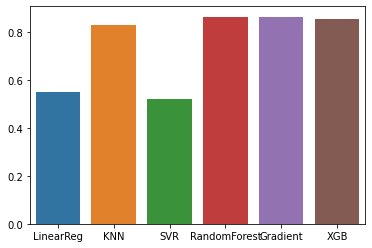

In [103]:
sns.barplot(algorithms,scores)

**AS WE CAN CLEARLY SEE THE R2 SCORES OF BOTH 'GradientBoostingRegressor' & 'RandomForestRegressor' ARE THE HIGHEST WHEN COMPARED TO OTHER MODEL, WE CAN CONCLUDE THAT 'GradientBoostingRegressor' IS THE BEST MODEL IN THIS CASE, AS IT IS TAKING LESSER TIME THAN 'RandomForestRegressor'.**

# Question No:4 ( 15 Marks)

A. Perform Hyper parameter tuning on every algorithm by using any one of available options such as GridSearch, K-Fold, Randomized Search. 

1. Give little overview about Grid Search, K-Fold and Randomized search. (5 Marks)

2. Get the improvised Model of each Algorithm through hyper parameter tuning and justify the best Model using R2 score (10 Marks)

**Grid Search:-**GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters. As there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters. GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

**K Fold:-** In K Fold cross validation, the data is divided into k subsets and train our model on k-1 subsets and hold the last one for test. This process is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set.

**Randomized search:-**Randomized search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. Random search works best for lower dimensional data since the time taken to find the right set is less with less number of iterations. Random search is the best parameter search technique when there are less number of dimensions.
The drawback of random search is that it yields high variance during computing. Since the selection of parameters is completely random, and since no intelligence is used to sample these combinations, luck plays its part.

In [82]:
#CREATING A LIST TO STORE THE NAME OF THE MODEL & THEIR RESPECTIVE R2 SCORE
#SO THAT WE CAN PLOT A GRAPH BETWEEN THE MODEL & THEIR SCORE AT THE END
algorithms = []
scores = []

In [83]:
##Your Code
#GRID SEARCH Hyper Parameter tuning

from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_




({'learning_rate': 0.15, 'n_estimators': 100}, 0.8640852263792281)

In [84]:
gradientregressor = GradientBoostingRegressor(n_estimators=100,learning_rate=0.15)
model = gradientregressor.fit(X_train, y_train)
diameterPrediction = model.predict(X_test)
r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('GradientBoost')
scores.append(r2)


R2 Score :  0.8642668190731437


In [48]:
#KFOLD hyper parameter tuning

from sklearn.model_selection import KFold
KNN = KNeighborsRegressor()
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [3,4,5,6,7], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=KNN, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [49]:
grid.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [85]:
model = KNeighborsRegressor(n_neighbors=7, weights="uniform" )
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('KNN')
scores.append(r2)

root mean square error : 15.37189848161624
R2 Score :  0.806468222115843


In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [52]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()

In [54]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [55]:
y = df['diameter']
x = df.drop(['diameter'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)

In [57]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [58]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 64}

In [59]:
y = df['diameter']
x = df.drop(['diameter'],axis = 1)
SS_scaler = StandardScaler()
X_std = SS_scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(bootstrap = False,
 max_depth = 4,
 max_features = 'sqrt',
 min_samples_leaf = 2,
 min_samples_split = 5,
 n_estimators = 64)
model.fit(X_train, y_train)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('RandomForest')
scores.append(r2)

root mean square error : 15.777841546548029
R2 Score :  0.7961116311569529


In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {"gamma": [1,0.1,0.01,0.001],
              'max_depth': [2,3,4],
              'n_estimators':[100,150,200,250],
    "kernel": ["linear","rbf"],
    "C":[0.1,1,10]
}
tuning = GridSearchCV(estimator =XGBRegressor(objective='reg:squarederror'), 
            param_grid = parameters, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_


({'C': 0.1,
  'gamma': 1,
  'kernel': 'linear',
  'max_depth': 4,
  'n_estimators': 100},
 0.846782985925052)

In [87]:
from xgboost import XGBRegressor

xgbregressor = XGBRegressor(max_depth = 4, c = 0.1, n_estimators = 100, gamma = 1, kernel = 'linear', objective='reg:squarederror')
model = xgbregressor.fit(X_train, y_train)
diameterPrediction = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('XGB')
scores.append(r2)


root mean square error : 12.424774612840476
R2 Score :  0.873562963048458


In [63]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              }

tuning = GridSearchCV(estimator =SVR(), 
            param_grid = parameters, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_              

({'C': 1000, 'gamma': 0.001}, 0.8717053128246045)

In [88]:
from sklearn.svm import SVR
model = SVR(C = 1000, gamma = 0.001)
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('SVR')
scores.append(r2)

root mean square error : 10.912508367093
R2 Score :  0.9024681526207968


AS HYPERPARAMETER TUNING IS NOT REQUIRED IN LINEAR REGRESSION, I HAVE DONE RIDGE & LASSO REGULARIZATION.

In [89]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('RIDGE')
scores.append(r2)

root mean square error : 23.402681476124005
R2 Score :  0.5514317668696214


In [90]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

algorithms.append('LASSO')
scores.append(r2)

root mean square error : 23.415923514007485
R2 Score :  0.5509239927448397


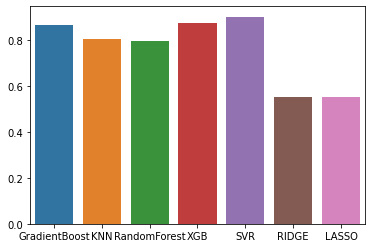

In [91]:
sns.barplot(algorithms,scores)

**AFTER HYPERPARAMETER TUNING THE MODEL, TO MY SURPRISE, SUPPORT VECTOR(SVR) REGRESSION IS GIVING THE HIGHEST R2 SCORE, IT HAS IMPROVED FROM 0.52 TO 0.90, THAT'S A MASSIVE IMPROVEMENT.**
 **THEREFORE, SVR IS THE BEST MODEL IN THIS CASE.**